In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('C:\\Users\\pm36995\\Documents\\Project Documents\\2023\\March\\MSD\\covid_modeling_final data_2.csv', sep = ",")

In [3]:
data.head()

,location,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Argentina,220546.331,0.000,2865.745,0.000,251.42,91.09,76.52,77.59,16.177,31.9,11.198,18933.907,0.600,5.50,16.2,27.7,5.000,76.67,0.845,45510324
1,Aruba,413238.899,0.000,2639.514,0.000,163.72,84.75,78.96,0.00,584.800,41.2,13.085,35973.781,0.159,11.62,0.0,0.0,0.073,76.29,0.000,106459
2,Bangladesh,11902.560,0.076,171.988,0.000,205.60,88.18,78.92,38.83,1265.036,27.5,5.098,3523.984,14.800,8.38,1.0,44.7,0.800,72.59,0.632,171186368
3,Belgium,402695.179,16.901,2880.510,0.257,254.09,79.49,78.65,99.64,375.564,41.8,18.571,42658.576,0.200,4.29,25.1,31.4,5.640,81.63,0.931,11655923
4,Brazil,170886.918,2.243,3236.021,0.009,224.60,87.80,81.51,57.95,25.040,33.5,8.552,14103.452,3.400,8.11,10.1,17.9,2.200,75.88,0.765,215313504


In [4]:
data.describe()

,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
count,41.000000,41.000000,41.00000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,4.100000e+01
mean,263198.252463,29.061098,1960.93500,0.452780,195.916341,72.326585,66.984634,50.689512,194.103415,36.136585,13.319537,27844.574293,2.383951,8.567561,16.434146,31.565854,3.563951,77.470000,0.764049,7.714831e+07
std,184813.147536,59.648632,1543.37899,1.043561,70.731472,21.097435,21.372663,35.476556,300.076096,8.110942,6.429254,19337.965108,5.951084,4.812095,10.489366,16.025692,2.719206,5.053399,0.244052,2.270305e+08
min,4609.753000,0.000000,66.05800,0.000000,7.050000,0.000000,0.000000,0.000000,4.037000,18.000000,3.556000,3393.474000,0.017000,3.280000,0.000000,0.000000,0.000000,64.500000,0.000000,1.064590e+05
25%,99215.961000,0.000000,547.35000,0.000000,158.930000,66.300000,60.790000,22.500000,32.333000,29.100000,6.981000,12236.706000,0.170000,5.590000,8.500000,20.600000,1.600000,75.050000,0.715000,3.422796e+06
50%,261070.237000,2.243000,1716.26800,0.000000,202.170000,77.810000,73.610000,50.350000,87.176000,38.300000,14.312000,26808.164000,0.500000,7.110000,17.100000,33.100000,2.960000,78.490000,0.851000,1.038497e+07
75%,431422.097000,19.890000,2978.81400,0.423000,230.980000,85.960000,80.840000,77.510000,222.873000,42.700000,19.027000,37159.550000,1.400000,8.830000,23.300000,39.900000,5.200000,82.240000,0.916000,4.551032e+07
max,594419.074000,218.964000,6426.21600,6.033000,386.990000,95.650000,90.280000,140.100000,1454.037000,48.200000,27.049000,94277.965000,30.300000,23.360000,35.300000,78.100000,13.050000,84.630000,0.955000,1.417173e+09


In [5]:
data.isnull().sum()

location                               0
total_cases_per_million                0
new_cases_per_million                  0
total_deaths_per_million               0
new_deaths_per_million                 0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
total_boosters_per_hundred             0
population_density                     0
median_age                             0
aged_65_older                          0
gdp_per_capita                         0
extreme_poverty                        0
diabetes_prevalence                    0
female_smokers                         0
male_smokers                           0
hospital_beds_per_thousand             0
life_expectancy                        0
human_development_index                0
population                             0
dtype: int64

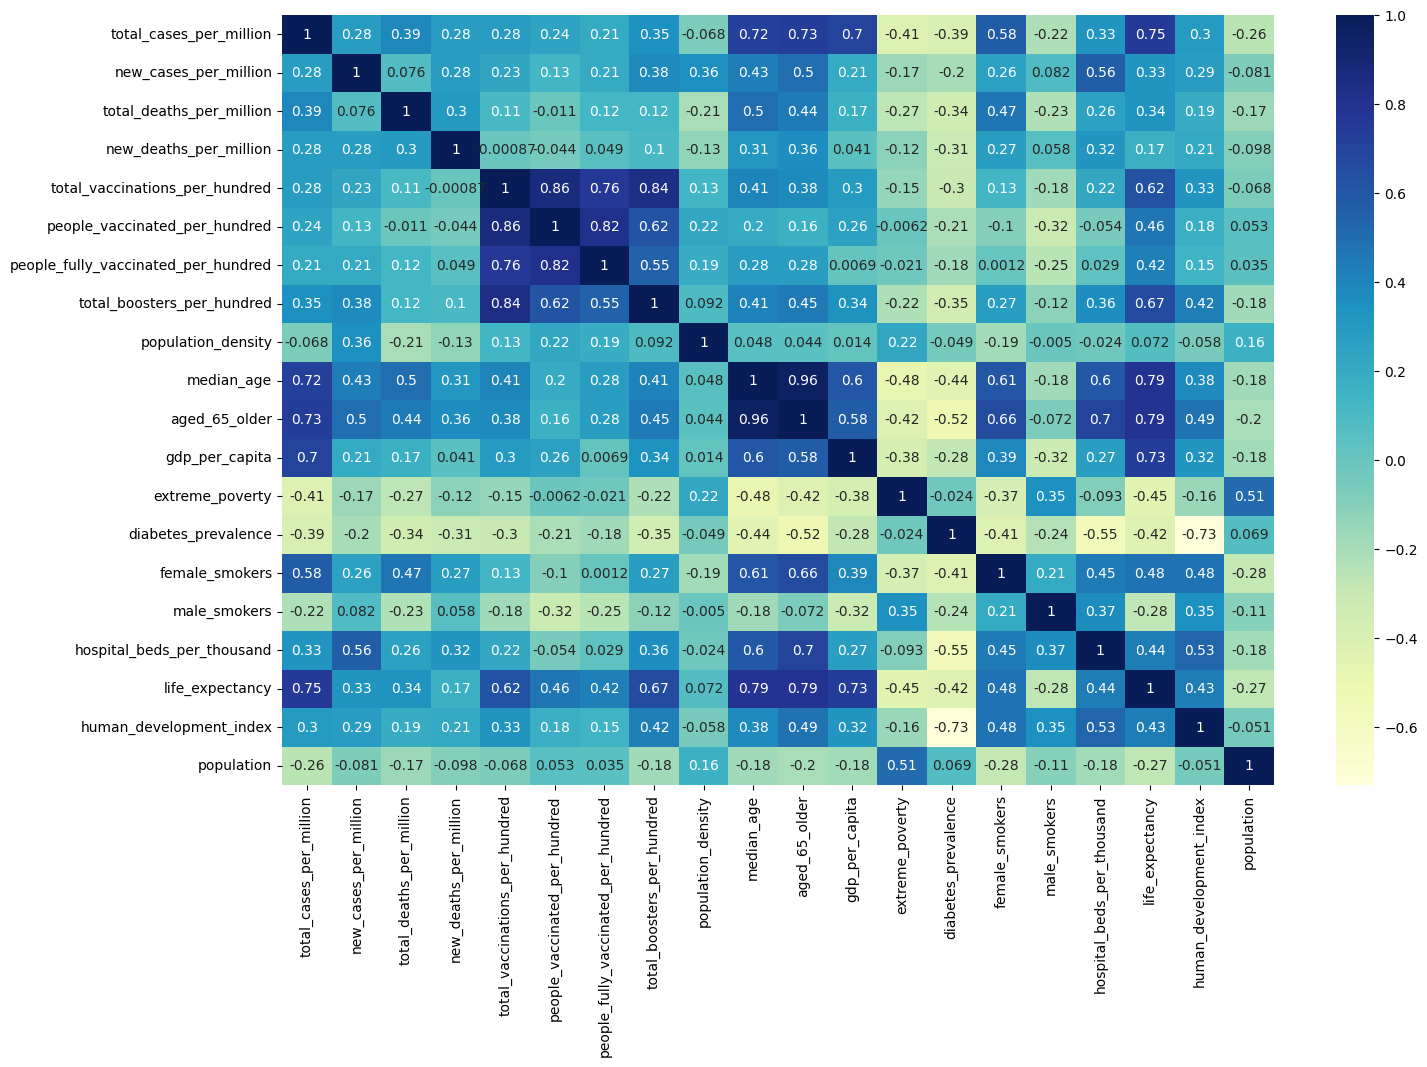

In [6]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

In [7]:
data_help = data.copy()
data_help.head()

,location,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Argentina,220546.331,0.000,2865.745,0.000,251.42,91.09,76.52,77.59,16.177,31.9,11.198,18933.907,0.600,5.50,16.2,27.7,5.000,76.67,0.845,45510324
1,Aruba,413238.899,0.000,2639.514,0.000,163.72,84.75,78.96,0.00,584.800,41.2,13.085,35973.781,0.159,11.62,0.0,0.0,0.073,76.29,0.000,106459
2,Bangladesh,11902.560,0.076,171.988,0.000,205.60,88.18,78.92,38.83,1265.036,27.5,5.098,3523.984,14.800,8.38,1.0,44.7,0.800,72.59,0.632,171186368
3,Belgium,402695.179,16.901,2880.510,0.257,254.09,79.49,78.65,99.64,375.564,41.8,18.571,42658.576,0.200,4.29,25.1,31.4,5.640,81.63,0.931,11655923
4,Brazil,170886.918,2.243,3236.021,0.009,224.60,87.80,81.51,57.95,25.040,33.5,8.552,14103.452,3.400,8.11,10.1,17.9,2.200,75.88,0.765,215313504


In [8]:
percentiles = data_help['total_cases_per_million'].quantile([0.05,0.95]).values
data_help['total_cases_per_million'][data_help['total_cases_per_million'] <= percentiles[0]] = percentiles[0]
data_help['total_cases_per_million'][data_help['total_cases_per_million'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['new_cases_per_million'].quantile([0.05,0.95]).values
data_help['new_cases_per_million'][data_help['new_cases_per_million'] <= percentiles[0]] = percentiles[0]
data_help['new_cases_per_million'][data_help['new_cases_per_million'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['total_deaths_per_million'].quantile([0.05,0.95]).values
data_help['total_deaths_per_million'][data_help['total_deaths_per_million'] <= percentiles[0]] = percentiles[0]
data_help['total_deaths_per_million'][data_help['total_deaths_per_million'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['new_deaths_per_million'].quantile([0.05,0.95]).values
data_help['new_deaths_per_million'][data_help['new_deaths_per_million'] <= percentiles[0]] = percentiles[0]
data_help['new_deaths_per_million'][data_help['new_deaths_per_million'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['total_vaccinations_per_hundred'].quantile([0.05,0.95]).values
data_help['total_vaccinations_per_hundred'][data_help['total_vaccinations_per_hundred'] <= percentiles[0]] = percentiles[0]
data_help['total_vaccinations_per_hundred'][data_help['total_vaccinations_per_hundred'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['people_vaccinated_per_hundred'].quantile([0.05,0.95]).values
data_help['people_vaccinated_per_hundred'][data_help['people_vaccinated_per_hundred'] <= percentiles[0]] = percentiles[0]
data_help['people_vaccinated_per_hundred'][data_help['people_vaccinated_per_hundred'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['people_fully_vaccinated_per_hundred'].quantile([0.05,0.95]).values
data_help['people_fully_vaccinated_per_hundred'][data_help['people_fully_vaccinated_per_hundred'] <= percentiles[0]] = percentiles[0]
data_help['people_fully_vaccinated_per_hundred'][data_help['people_fully_vaccinated_per_hundred'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['total_boosters_per_hundred'].quantile([0.05,0.95]).values
data_help['total_boosters_per_hundred'][data_help['total_boosters_per_hundred'] <= percentiles[0]] = percentiles[0]
data_help['total_boosters_per_hundred'][data_help['total_boosters_per_hundred'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['population_density'].quantile([0.05,0.95]).values
data_help['population_density'][data_help['population_density'] <= percentiles[0]] = percentiles[0]
data_help['population_density'][data_help['population_density'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['median_age'].quantile([0.05,0.95]).values
data_help['median_age'][data_help['median_age'] <= percentiles[0]] = percentiles[0]
data_help['median_age'][data_help['median_age'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['aged_65_older'].quantile([0.05,0.95]).values
data_help['aged_65_older'][data_help['aged_65_older'] <= percentiles[0]] = percentiles[0]
data_help['aged_65_older'][data_help['aged_65_older'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['gdp_per_capita'].quantile([0.05,0.95]).values
data_help['gdp_per_capita'][data_help['gdp_per_capita'] <= percentiles[0]] = percentiles[0]
data_help['gdp_per_capita'][data_help['gdp_per_capita'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['extreme_poverty'].quantile([0.05,0.95]).values
data_help['extreme_poverty'][data_help['extreme_poverty'] <= percentiles[0]] = percentiles[0]
data_help['extreme_poverty'][data_help['extreme_poverty'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['diabetes_prevalence'].quantile([0.05,0.95]).values
data_help['diabetes_prevalence'][data_help['diabetes_prevalence'] <= percentiles[0]] = percentiles[0]
data_help['diabetes_prevalence'][data_help['diabetes_prevalence'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['female_smokers'].quantile([0.05,0.95]).values
data_help['female_smokers'][data_help['female_smokers'] <= percentiles[0]] = percentiles[0]
data_help['female_smokers'][data_help['female_smokers'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['male_smokers'].quantile([0.05,0.95]).values
data_help['male_smokers'][data_help['male_smokers'] <= percentiles[0]] = percentiles[0]
data_help['male_smokers'][data_help['male_smokers'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['hospital_beds_per_thousand'].quantile([0.05,0.95]).values
data_help['hospital_beds_per_thousand'][data_help['hospital_beds_per_thousand'] <= percentiles[0]] = percentiles[0]
data_help['hospital_beds_per_thousand'][data_help['hospital_beds_per_thousand'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['life_expectancy'].quantile([0.05,0.95]).values
data_help['life_expectancy'][data_help['life_expectancy'] <= percentiles[0]] = percentiles[0]
data_help['life_expectancy'][data_help['life_expectancy'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['human_development_index'].quantile([0.05,0.95]).values
data_help['human_development_index'][data_help['human_development_index'] <= percentiles[0]] = percentiles[0]
data_help['human_development_index'][data_help['human_development_index'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['population'].quantile([0.05,0.95]).values
data_help['population'][data_help['population'] <= percentiles[0]] = percentiles[0]
data_help['population'][data_help['population'] >= percentiles[1]] = percentiles[1]

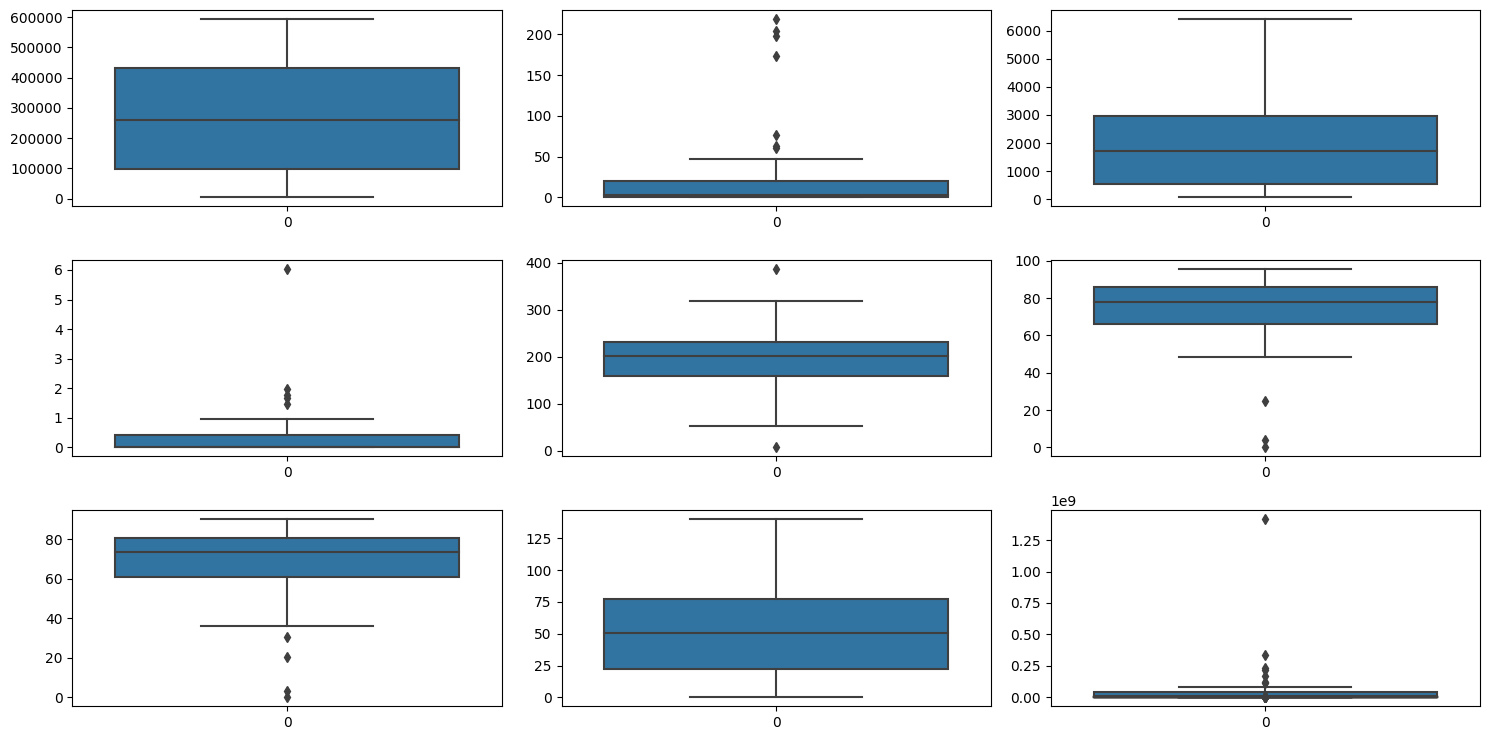

In [9]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(data['total_cases_per_million'], ax = axs[0,0])
plt2 = sns.boxplot(data['new_cases_per_million'], ax = axs[0,1])
plt3 = sns.boxplot(data['total_deaths_per_million'], ax = axs[0,2])
plt4 = sns.boxplot(data['new_deaths_per_million'], ax = axs[1,0])
plt5 = sns.boxplot(data['total_vaccinations_per_hundred'], ax = axs[1,1])
plt6 = sns.boxplot(data['people_vaccinated_per_hundred'], ax = axs[1,2])
plt7 = sns.boxplot(data['people_fully_vaccinated_per_hundred'], ax = axs[2,0])
plt8 = sns.boxplot(data['total_boosters_per_hundred'], ax = axs[2,1])
plt9 = sns.boxplot(data['population_density'], ax = axs[2,2])
plt10 = sns.boxplot(data['median_age'], ax = axs[2,2])
plt11 = sns.boxplot(data['aged_65_older'], ax = axs[2,2])
plt12 = sns.boxplot(data['gdp_per_capita'], ax = axs[2,2])
plt13 = sns.boxplot(data['extreme_poverty'], ax = axs[2,2])
plt14 = sns.boxplot(data['diabetes_prevalence'], ax = axs[2,2])
plt15 = sns.boxplot(data['female_smokers'], ax = axs[2,2])
plt16 = sns.boxplot(data['male_smokers'], ax = axs[2,2])
plt17 = sns.boxplot(data['hospital_beds_per_thousand'], ax = axs[2,2])
plt18 = sns.boxplot(data['life_expectancy'], ax = axs[2,2])
plt19 = sns.boxplot(data['human_development_index'], ax = axs[2,2])
plt20 = sns.boxplot(data['population'], ax = axs[2,2])


plt.tight_layout()

In [10]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['total_cases_per_million',
'new_cases_per_million',
'total_deaths_per_million',
'new_deaths_per_million',
'total_vaccinations_per_hundred',
'people_vaccinated_per_hundred',
'people_fully_vaccinated_per_hundred',
'total_boosters_per_hundred',
'population_density',
'median_age',
'aged_65_older',
'gdp_per_capita',
'extreme_poverty',
'diabetes_prevalence',
'female_smokers',
'male_smokers',
'hospital_beds_per_thousand',
'life_expectancy',
'human_development_index',
'population']
# Scale these variables using 'fit_transform'
data_help[varlist] = scaler.fit_transform(data_help[varlist])

In [11]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [12]:
# Putting feature variable to X
X = data_help.drop(['location'],axis=1)

# Putting response variable to y
y = data_help['location']

In [13]:
pca.fit(X)

PCA(random_state=42, svd_solver='randomized')

In [14]:
pca.components_

array([[-2.89364962e-01, -1.80278900e-01, -2.04709170e-01,
        -1.69812420e-01, -2.24623814e-01, -1.55662933e-01,
        -1.66628766e-01, -2.49144456e-01, -8.27041924e-03,
        -3.21322651e-01, -3.30968258e-01, -2.66138156e-01,
         1.77041244e-01,  2.38424268e-01, -2.47599569e-01,
         2.58516402e-02, -2.31925184e-01, -3.24582617e-01,
        -2.15172855e-01,  9.59591539e-02],
       [ 4.63563335e-02,  2.25390998e-02,  1.49639308e-01,
         1.54895718e-01, -3.82059260e-01, -4.64772972e-01,
        -4.12529565e-01, -2.70316545e-01, -2.00892556e-01,
         8.03894923e-02,  1.18832636e-01, -4.04457916e-02,
        -1.22364518e-01, -7.46747766e-02,  2.57655272e-01,
         2.78905862e-01,  2.70302575e-01, -8.58074047e-02,
         9.15661663e-02, -1.72079587e-01],
       [ 2.13485665e-01, -2.19866585e-01,  1.17553448e-01,
        -1.50459241e-01, -9.69788408e-02, -6.79732464e-02,
        -7.43904299e-02, -9.40461758e-02, -1.82767051e-01,
         6.89611638e-02,  2.3

In [15]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.289365,0.046356,total_cases_per_million
1,-0.180279,0.022539,new_cases_per_million
2,-0.204709,0.149639,total_deaths_per_million
3,-0.169812,0.154896,new_deaths_per_million
4,-0.224624,-0.382059,total_vaccinations_per_hundred


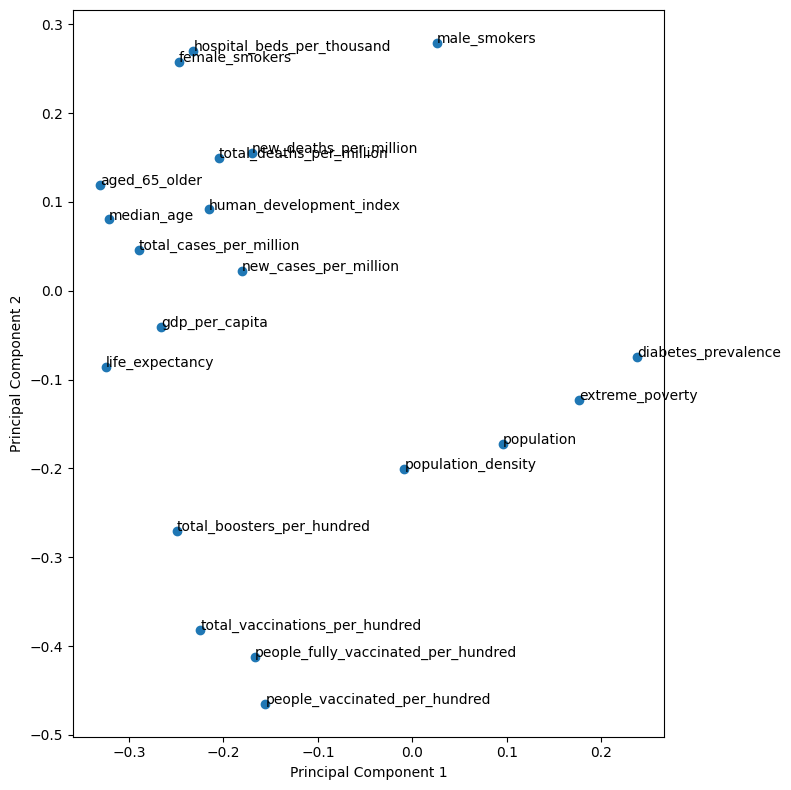

In [16]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [17]:
pca.explained_variance_ratio_

array([0.37901844, 0.16335277, 0.10377837, 0.07003273, 0.05857054,
       0.05107669, 0.03591898, 0.02903978, 0.02051331, 0.01706947,
       0.01574905, 0.0140657 , 0.01110803, 0.01003179, 0.0070937 ,
       0.00465208, 0.00440024, 0.00259163, 0.00115284, 0.00078387])

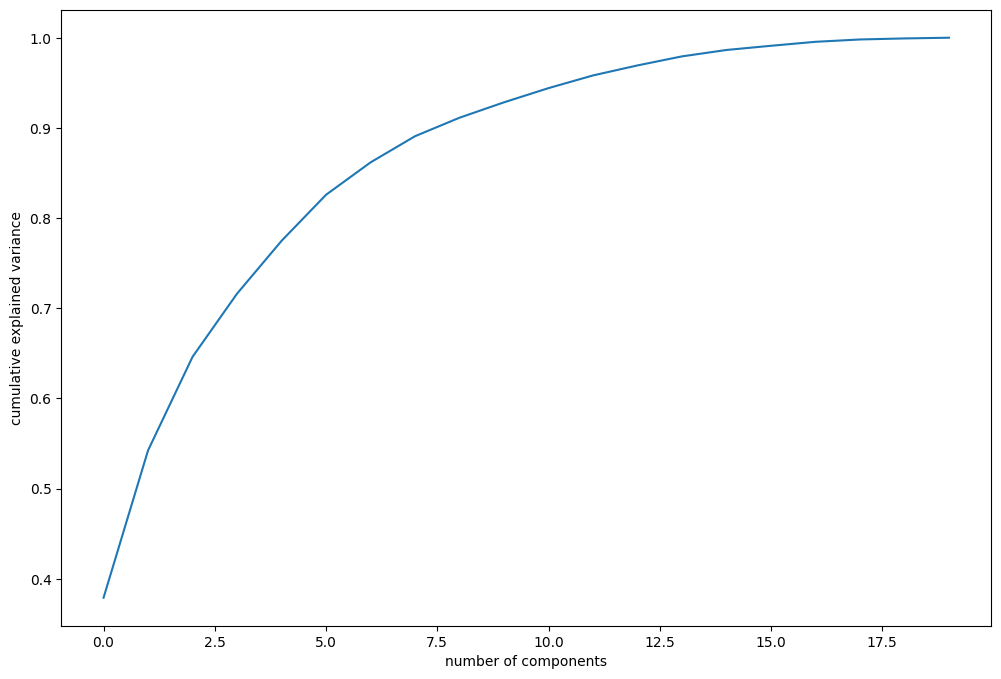

In [18]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [19]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=8) #more than 90% of data is explained by 8 components

In [20]:
df_pca = pca_final.fit_transform(X)
df_pca.shape

(41, 8)

In [21]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7
0,0.548582,0.922749,0.364538,-1.788684,0.516477,-0.260765,-0.223419,-0.013259
1,-1.255348,1.973706,-3.265587,3.369990,0.634425,0.067023,-1.546933,0.825798
2,-3.726066,2.818915,3.244675,1.531467,0.067795,-0.965279,-1.074578,0.667897
3,3.131675,0.557668,0.283194,0.108362,-0.662655,-0.684175,-0.858782,0.215590
4,-0.918917,1.845802,0.474705,-0.627971,1.942233,-0.922443,1.324936,0.221132


In [22]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

<Axes: >

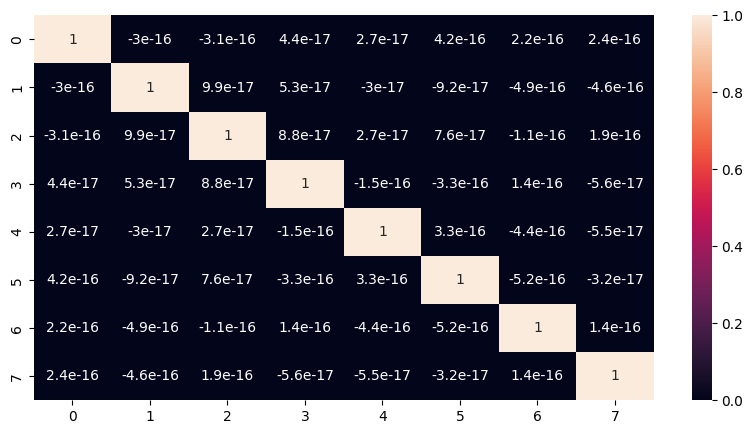

In [23]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [24]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [25]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [26]:
hopkins(df_pca)

0.7007444776396324

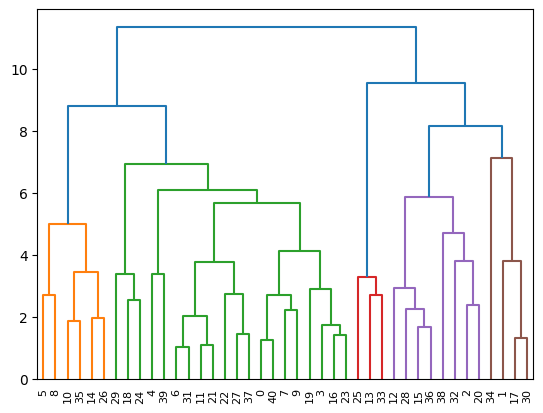

In [27]:
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [49]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
#df_pca_hc.columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","ClusterID"]
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,ClusterID
0,0.548582,0.922749,0.364538,-1.788684,0.516477,-0.260765,-0.223419,-0.013259,0
1,-1.255348,1.973706,-3.265587,3.369990,0.634425,0.067023,-1.546933,0.825798,1
2,-3.726066,2.818915,3.244675,1.531467,0.067795,-0.965279,-1.074578,0.667897,2
3,3.131675,0.557668,0.283194,0.108362,-0.662655,-0.684175,-0.858782,0.215590,0
4,-0.918917,1.845802,0.474705,-0.627971,1.942233,-0.922443,1.324936,0.221132,0


In [29]:
pca_cluster_hc = pd.concat([data_help['location'],df_pca_hc], axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

,location,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,ClusterID
0,Argentina,0.548582,0.922749,0.364538,-1.788684,0.516477,-0.260765,-0.223419,-0.013259,0
1,Aruba,-1.255348,1.973706,-3.265587,3.369990,0.634425,0.067023,-1.546933,0.825798,1
2,Bangladesh,-3.726066,2.818915,3.244675,1.531467,0.067795,-0.965279,-1.074578,0.667897,2
3,Belgium,3.131675,0.557668,0.283194,0.108362,-0.662655,-0.684175,-0.858782,0.215590,0
4,Brazil,-0.918917,1.845802,0.474705,-0.627971,1.942233,-0.922443,1.324936,0.221132,3


In [30]:
clustered_data_hc = pca_cluster_hc[['location','ClusterID']].merge(data, on = 'location')
clustered_data_hc.head()

,location,ClusterID,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Argentina,0,220546.331,0.000,2865.745,0.000,251.42,91.09,76.52,77.59,16.177,31.9,11.198,18933.907,0.600,5.50,16.2,27.7,5.000,76.67,0.845,45510324
1,Aruba,1,413238.899,0.000,2639.514,0.000,163.72,84.75,78.96,0.00,584.800,41.2,13.085,35973.781,0.159,11.62,0.0,0.0,0.073,76.29,0.000,106459
2,Bangladesh,2,11902.560,0.076,171.988,0.000,205.60,88.18,78.92,38.83,1265.036,27.5,5.098,3523.984,14.800,8.38,1.0,44.7,0.800,72.59,0.632,171186368
3,Belgium,0,402695.179,16.901,2880.510,0.257,254.09,79.49,78.65,99.64,375.564,41.8,18.571,42658.576,0.200,4.29,25.1,31.4,5.640,81.63,0.931,11655923
4,Brazil,3,170886.918,2.243,3236.021,0.009,224.60,87.80,81.51,57.95,25.040,33.5,8.552,14103.452,3.400,8.11,10.1,17.9,2.200,75.88,0.765,215313504


In [31]:
hc_clusters_total_cases_per_million = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_cases_per_million.mean())
hc_clusters_new_cases_per_million = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).new_cases_per_million.mean())
hc_clusters_total_deaths_per_million = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_deaths_per_million.mean())
hc_clusters_new_deaths_per_million = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).new_deaths_per_million.mean())
hc_clusters_total_vaccinations_per_hundred = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_vaccinations_per_hundred.mean())
hc_clusters_people_vaccinated_per_hundred = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).people_vaccinated_per_hundred.mean())
hc_clusters_people_fully_vaccinated_per_hundred = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).people_fully_vaccinated_per_hundred.mean())
hc_clusters_total_boosters_per_hundred = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_boosters_per_hundred.mean())
hc_clusters_population_density = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).population_density.mean())
hc_clusters_median_age = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).median_age.mean())
hc_clusters_aged_65_older = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).aged_65_older.mean())
hc_clusters_gdp_per_capita = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdp_per_capita.mean())
hc_clusters_extreme_poverty = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).extreme_poverty.mean())
hc_clusters_diabetes_prevalence = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).diabetes_prevalence.mean())
hc_clusters_female_smokers = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).female_smokers.mean())
hc_clusters_male_smokers = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).male_smokers.mean())
hc_clusters_hospital_beds_per_thousand = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).hospital_beds_per_thousand.mean())
hc_clusters_life_expectancy = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expectancy.mean())
hc_clusters_human_development_index = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).human_development_index.mean())
hc_clusters_population = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).population.mean())

In [40]:
df = pd.concat([pd.Series(list(range(0,9))), hc_clusters_total_cases_per_million,hc_clusters_new_cases_per_million, 
                hc_clusters_total_deaths_per_million, 
                hc_clusters_new_deaths_per_million,hc_clusters_total_vaccinations_per_hundred,hc_clusters_people_vaccinated_per_hundred,
               hc_clusters_people_fully_vaccinated_per_hundred, hc_clusters_total_boosters_per_hundred, hc_clusters_population_density,
                hc_clusters_median_age, hc_clusters_aged_65_older, hc_clusters_gdp_per_capita, hc_clusters_extreme_poverty,
               hc_clusters_diabetes_prevalence, hc_clusters_female_smokers, hc_clusters_male_smokers, hc_clusters_hospital_beds_per_thousand,
               hc_clusters_life_expectancy, hc_clusters_human_development_index, hc_clusters_population], axis=1)
df.columns = ["ClusterID","total_cases_per_million_Mean", "new_cases_per_million_Mean", "total_deaths_per_million_Mean", 
              "new_deaths_per_million_Mean", "total_vaccinations_per_hundred_Mean","people_vaccinated_per_hundred_Mean", "people_fully_vaccinated_per_hundred_Mean",
              "total_boosters_per_hundred_Mean","population_density_Mean","median_age_Mean","aged_65_older_Mean","gdp_per_capita_Mean",
              "extreme_poverty_Mean", "diabetes_prevalence_Mean","female_smokers_Mean","male_smokers_Mean","hospital_beds_per_thousand_Mean",
              "life_expectancy_Mean","human_development_index_Mean","population_Mean"]
df

,ClusterID,total_cases_per_million_Mean,new_cases_per_million_Mean,total_deaths_per_million_Mean,new_deaths_per_million_Mean,total_vaccinations_per_hundred_Mean,people_vaccinated_per_hundred_Mean,people_fully_vaccinated_per_hundred_Mean,total_boosters_per_hundred_Mean,population_density_Mean,median_age_Mean,aged_65_older_Mean,gdp_per_capita_Mean,extreme_poverty_Mean,diabetes_prevalence_Mean,female_smokers_Mean,male_smokers_Mean,hospital_beds_per_thousand_Mean,life_expectancy_Mean,human_development_index_Mean,population_Mean
0,0,387461.213733,15.223400,2048.784000,0.227333,245.556667,82.746000,74.038000,77.148667,135.668733,39.780000,16.251733,39450.156600,0.524667,5.962667,21.320000,30.520000,3.781333,81.368000,0.896867,2.013483e+07
1,1,314502.264333,0.000000,1947.106333,0.000000,164.313333,71.126667,67.813333,23.953333,225.822000,35.766667,10.271333,31015.977000,0.173000,19.203333,6.666667,0.000000,0.024333,77.166667,0.000000,2.342367e+05
2,2,16893.242500,0.030500,194.826500,0.000000,163.085000,73.815000,66.140000,25.112500,514.551000,24.300000,4.784500,5388.867000,17.575000,8.495000,3.000000,45.025000,1.957500,69.755000,0.610000,4.563814e+08
3,3,234626.759000,1.121500,3239.451500,0.004500,213.265000,84.450000,75.375000,28.975000,30.324000,35.900000,11.982500,34164.449000,2.300000,9.450000,14.600000,21.250000,2.485000,77.370000,0.845500,2.768017e+08
4,4,339552.217167,58.123000,3790.087667,1.783667,141.266667,53.018333,56.878333,27.783333,79.379500,43.333333,19.128167,26676.828667,0.583833,5.303333,27.333333,38.833333,6.249000,77.720000,0.870167,1.087326e+07
5,5,88736.498500,2.846000,639.757750,0.014750,181.807500,77.612500,71.030000,31.735000,109.525500,27.025000,6.276000,14033.389250,0.882500,12.160000,9.100000,33.600000,1.450000,72.750000,0.756000,1.157980e+07
6,6,13470.852333,0.065667,246.878333,0.000000,50.170000,25.726667,20.016667,3.283333,49.517333,24.733333,4.485333,5922.291333,1.183333,14.023333,9.100000,49.800000,2.033333,69.313333,0.653000,4.258778e+07
7,7,311531.868667,198.737333,1366.879667,0.874000,265.186667,83.993333,82.643333,101.136667,679.610333,45.733333,22.642667,40248.263667,0.123333,7.620000,20.100000,32.333333,8.511667,82.830000,0.920333,6.928494e+07
8,8,131609.404000,4.258000,6426.216000,1.762000,256.510000,88.940000,83.680000,83.880000,25.129000,29.100000,7.151000,12236.706000,3.500000,5.950000,4.800000,0.000000,1.600000,76.740000,0.777000,3.404959e+07


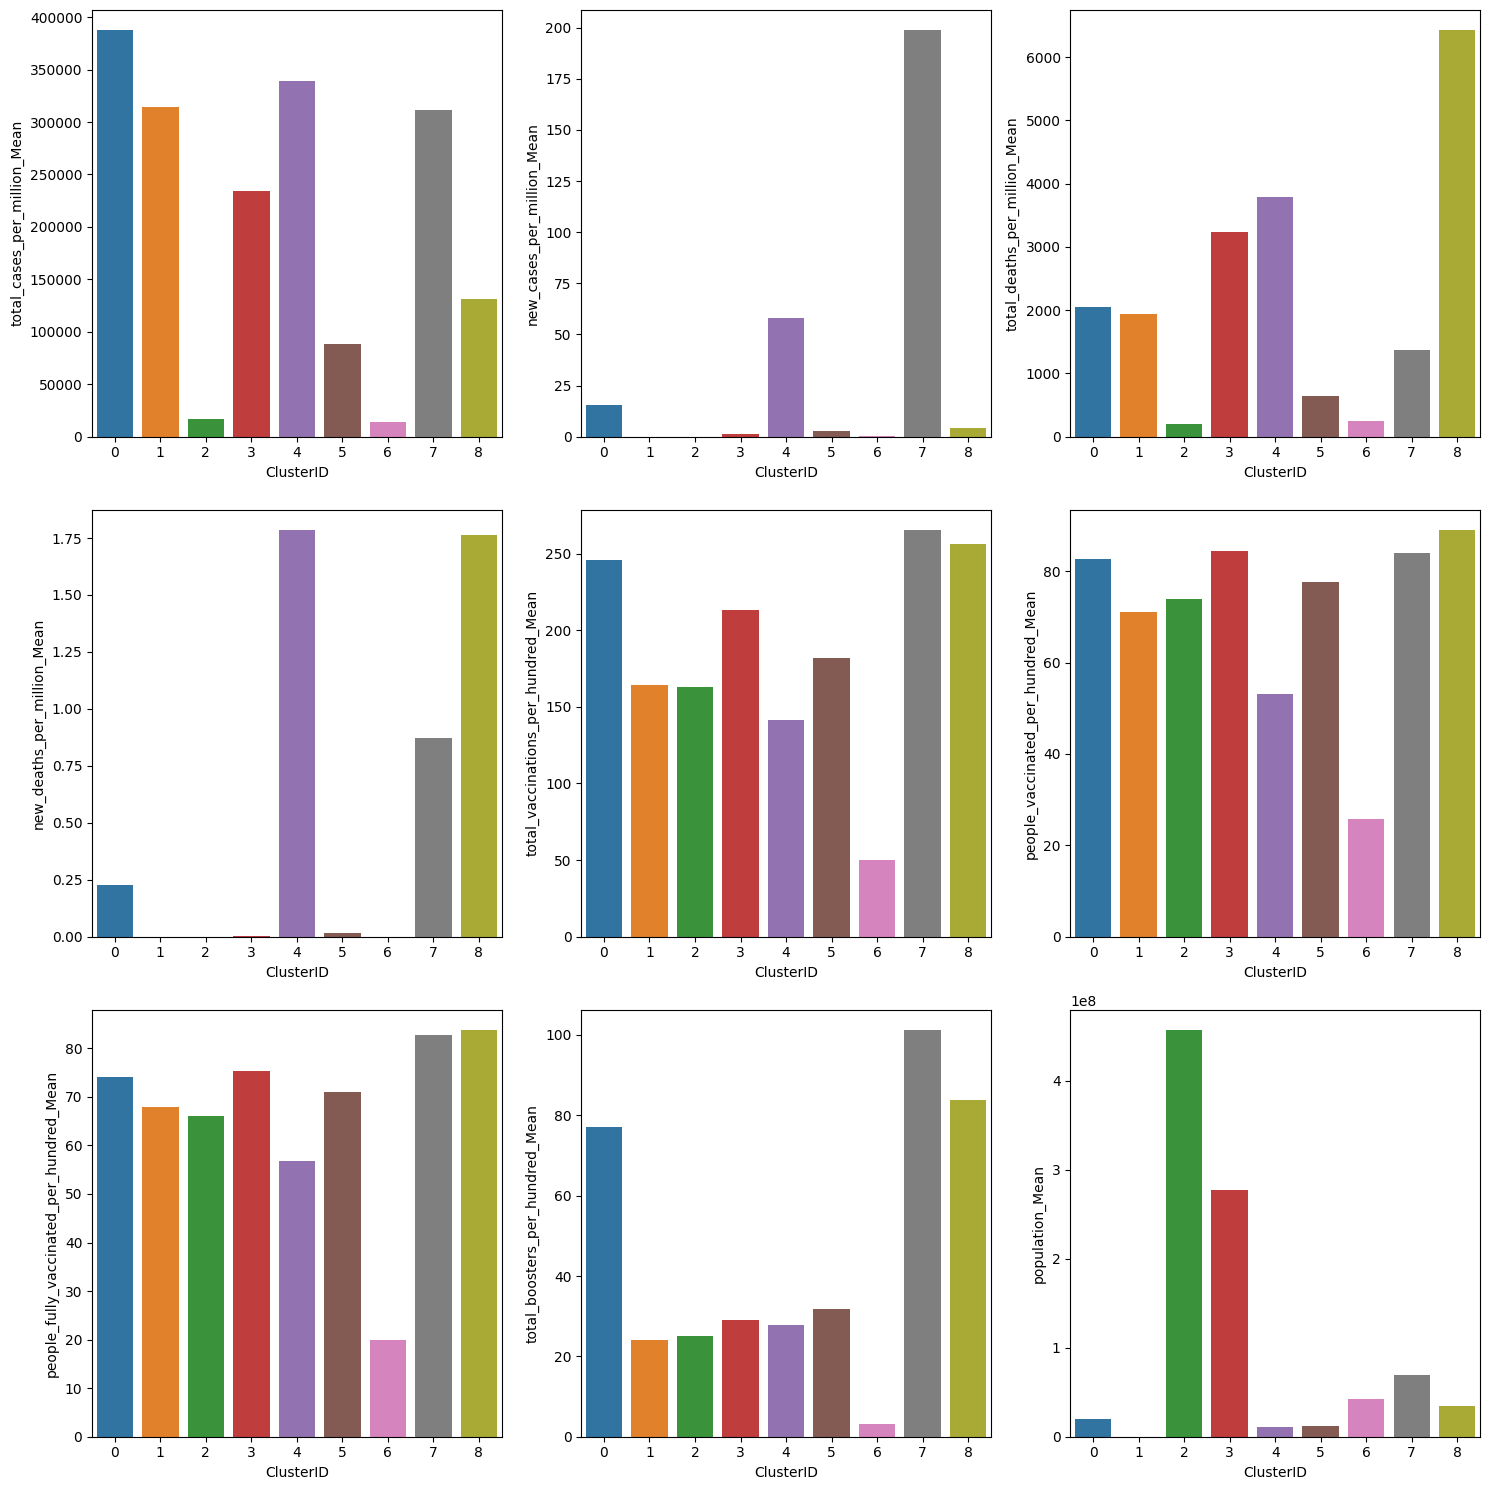

In [47]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df.ClusterID, y=df.total_cases_per_million_Mean, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.new_cases_per_million_Mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.total_deaths_per_million_Mean, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df.new_deaths_per_million_Mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.total_vaccinations_per_hundred_Mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.people_vaccinated_per_hundred_Mean, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df.people_fully_vaccinated_per_hundred_Mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.total_boosters_per_hundred_Mean, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df.population_density_Mean, ax = axs[2,2])
sns.barplot(x=df.ClusterID, y=df.median_age_Mean, ax = axs[2,2])
sns.barplot(x=df.ClusterID, y=df.aged_65_older_Mean, ax = axs[2,2])
sns.barplot(x=df.ClusterID, y=df.gdp_per_capita_Mean, ax = axs[2,2])
sns.barplot(x=df.ClusterID, y=df.extreme_poverty_Mean, ax = axs[2,2])
sns.barplot(x=df.ClusterID, y=df.diabetes_prevalence_Mean, ax = axs[2,2])
sns.barplot(x=df.ClusterID, y=df.female_smokers_Mean, ax = axs[2,2])
sns.barplot(x=df.ClusterID, y=df.male_smokers_Mean, ax = axs[2,2])
sns.barplot(x=df.ClusterID, y=df.hospital_beds_per_thousand_Mean, ax = axs[2,2])
sns.barplot(x=df.ClusterID, y=df.life_expectancy_Mean, ax = axs[2,2])
sns.barplot(x=df.ClusterID, y=df.human_development_index_Mean, ax = axs[2,2])
sns.barplot(x=df.ClusterID, y=df.population_Mean, ax = axs[2,2])

plt.tight_layout()

In [34]:
clustered_data_hc[clustered_data_hc.ClusterID == 4].location.values

array(['Bulgaria', 'Croatia', 'Czechia', 'Estonia', 'Lithuania', 'Poland'],
      dtype=object)

In [35]:
#Cluster with ClusterID as 4, is the cluster of most backward country